In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [5]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados.head()


,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [6]:
dados.columns = [coluna.replace('-', '') for coluna in dados.columns]


# Desafio 01 e 02: Ordenar o gráfico countplot e Melhorar a visualização alterando tamanho da fonte...

In [7]:
drogas = dados.droga.value_counts().index[:5]
drogas_mais = dados.query('droga in @drogas')

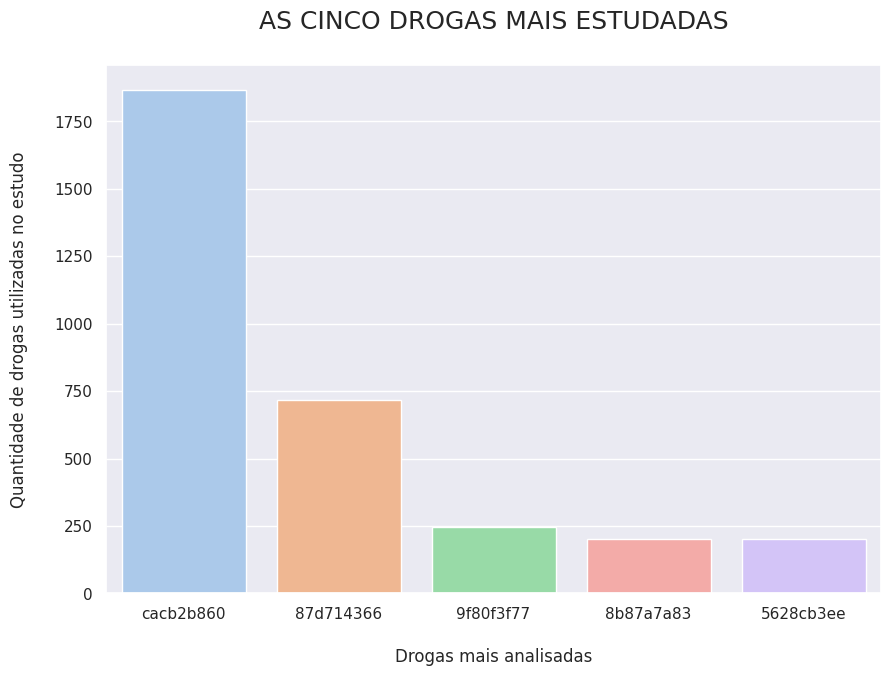

In [8]:
plt.figure(figsize=(10,7), dpi=100)
ax = sns.countplot(x = 'droga', data=drogas_mais, order = drogas, palette=sns.color_palette('pastel'))
ax.set_title('As Cinco drogas mais estudadas\n'.upper(),fontsize= 18)
ax.set_ylabel('Quantidade de drogas utilizadas no estudo\n')
ax.set_xlabel('\nDrogas mais analisadas')
plt.show()

# Desafio 03: Plotar os histogramas com seaborn

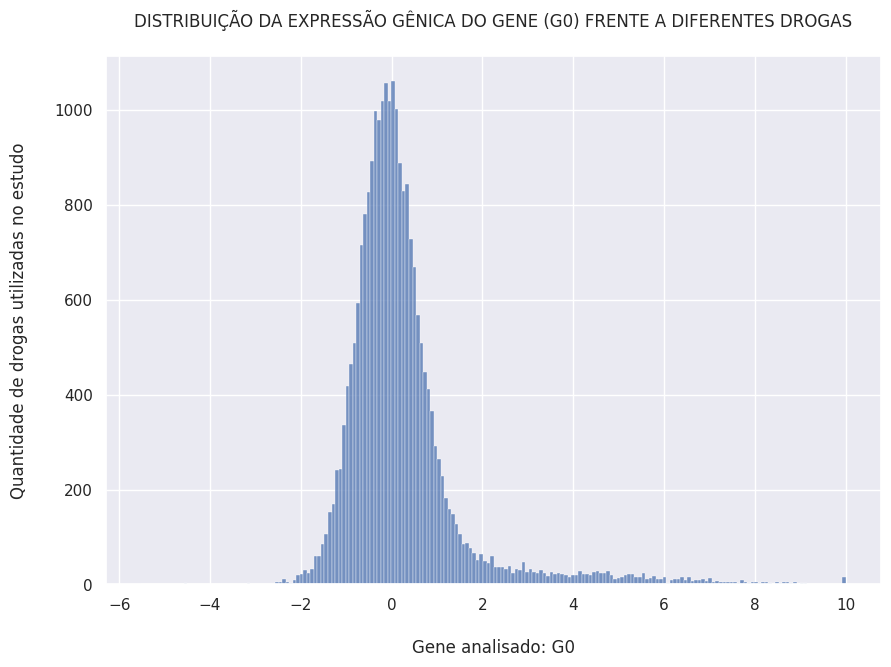

In [9]:
coluna_analisar = 'g0'
data = dados[coluna_analisar]
plt.figure(figsize=(10,7), dpi=100)
ax = sns.histplot(data=data, bins=200)
ax.set_ylabel('Quantidade de drogas utilizadas no estudo\n')
ax.set_xlabel(f'\nGene analisado: {coluna_analisar.upper()}')
ax.set_title(f'Distribuição da expressão gênica do gene ({coluna_analisar}) frente a diferentes drogas\n'.upper())
plt.show()

#Desafio 04: Estudar sobre as estatíticas retornadas no .describe()

In [10]:
dados.loc[:,'g0'].describe()

count    23814.000000
mean         0.248366
std          1.393399
min         -5.513000
25%         -0.473075
50%         -0.008850
75%          0.525700
max         10.000000
Name: g0, dtype: float64

*De acordo com a documentção do 'Pandas' a funcão describe() nos gera estatísticas descritivas que resumem a tendência central, dispersão e formato de distribuição de um Dataset, e o que é importante, excluindo os valores nulos. 
Desta forma, essas informações podem nos indicar a qualidade dos dados analisados e também podem ser utilizados na construções de gráfico para auxilar na visualização deste conjunto de dados.*

# Desafio 05: Refletir sobre a manipulação do tamanho das visualizações.

A manipulação no tamanho das visualizações é importante para ajudar na leitura, pois gráficos muito pequenos deixam os valores e descrições ilegiveis e se forem muito grande podem dificultar no fácil entendimento do que se deseja explicar.
Outro motivo é o tempo de execução do código, que pode levar muito tempo e utilizar memória de processamento de forma desnecessária para plotar um gráfico simples.

GRÁFICO PEQUENO DEMAIS


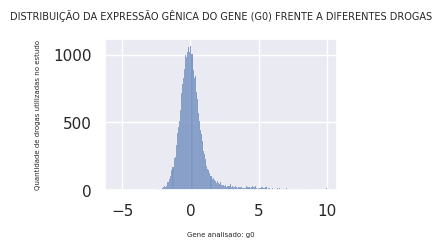

In [11]:
print('Gráfico pequeno demais'.upper())
plt.figure(figsize=(3,2), dpi=100)
ax = sns.histplot(data=dados['g0'], bins=200)
ax.set_ylabel('Quantidade de drogas utilizadas no estudo\n', fontsize=5)
ax.set_xlabel(f'\nGene analisado: g0', fontsize=5)
ax.set_title(f'Distribuição da expressão gênica do gene (g0) frente a diferentes drogas\n'.upper(), fontsize=7)
plt.show()

GRÁFICO GRANDE DEMAIS


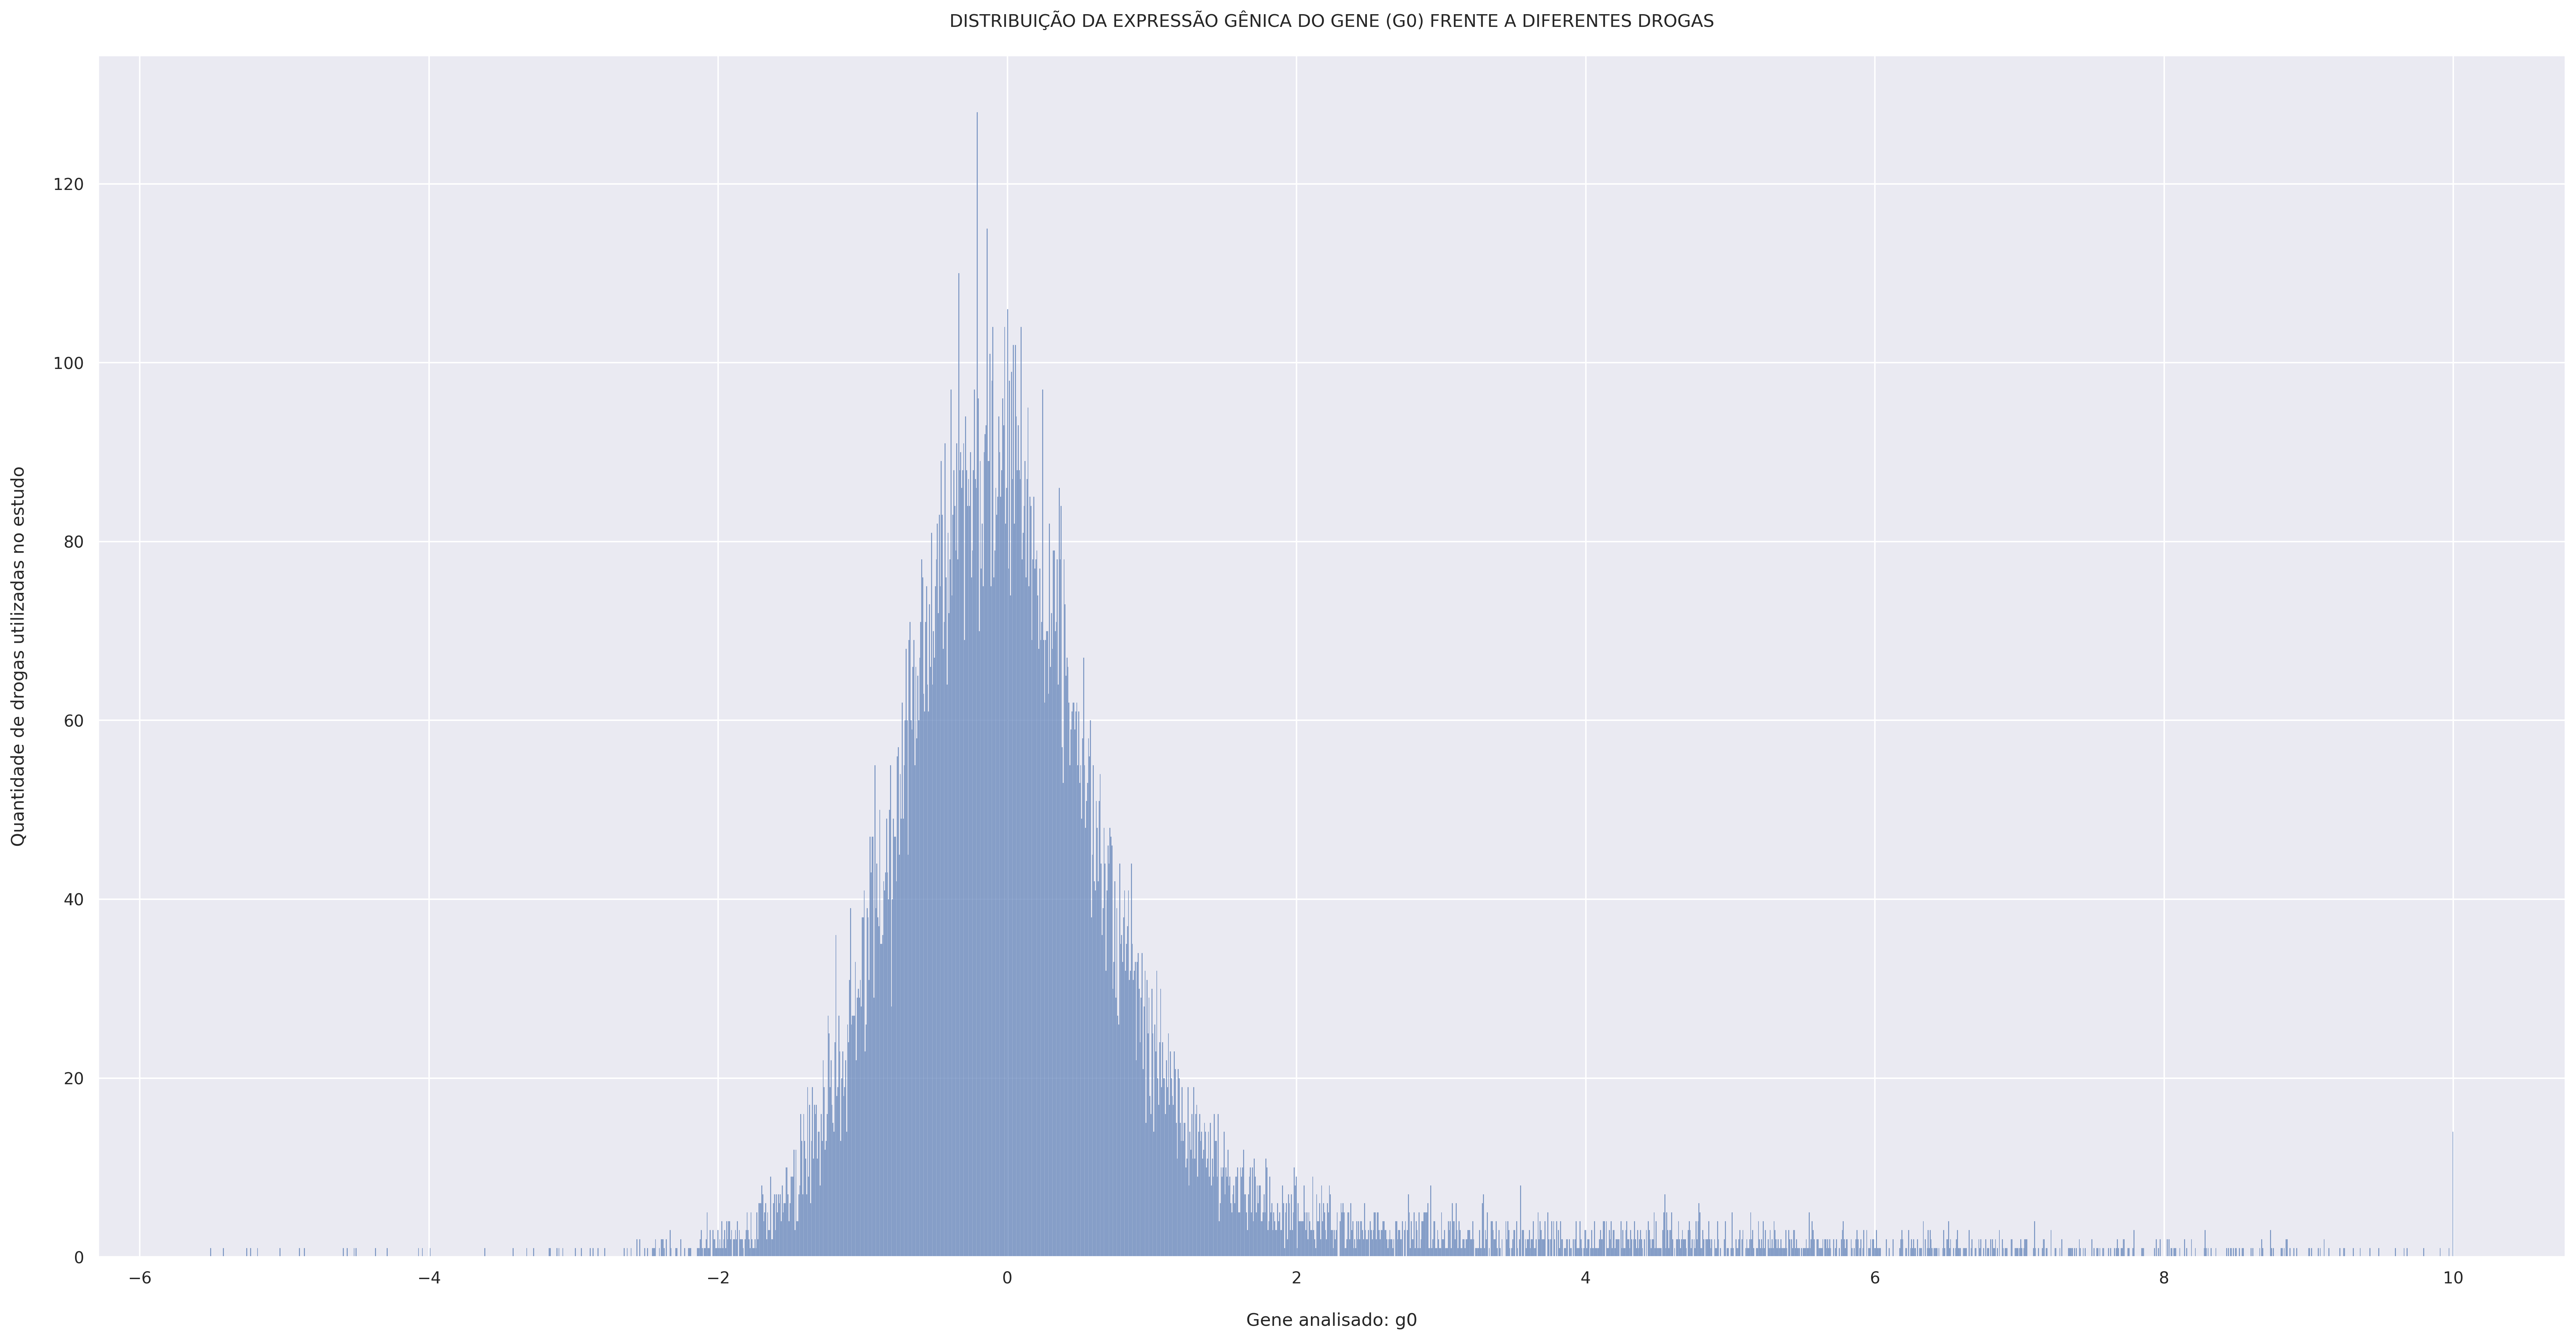

In [12]:
print('Gráfico grande demais'.upper())
plt.figure(figsize=(30,15), dpi=300)
ax = sns.histplot(data=dados['g0'], bins=2300)
ax.set_ylabel('Quantidade de drogas utilizadas no estudo\n')
ax.set_xlabel(f'\nGene analisado: g0')
ax.set_title(f'Distribuição da expressão gênica do gene (g0) frente a diferentes drogas\n'.upper())
plt.show()

# Desafio 06: Fazer outras análises com o boxplot e até com o histograma.

In [13]:
expressao = dados['g0']

In [14]:
Q1 = expressao.quantile(.25)
Q2 = expressao.median()
Q3 = expressao.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - (1.5 * IIQ)
limite_superior = Q3 + (1.5 * IIQ) 

In [15]:
selecao = (expressao >= limite_inferior) & (expressao <= limite_superior)
dados_sel_gene = dados[selecao]

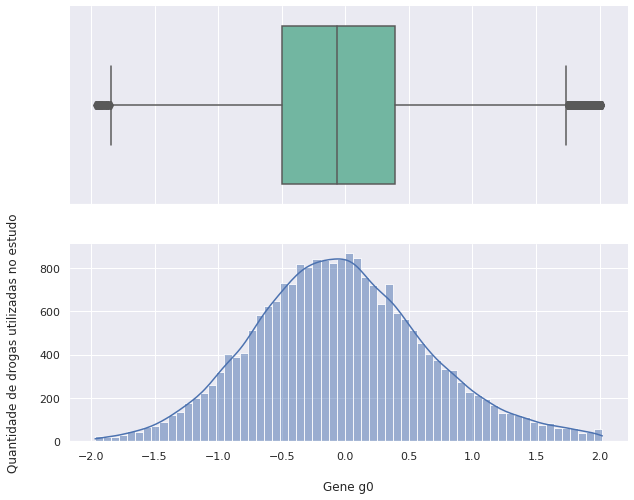

In [16]:
f, axes = plt.subplots(2,1, figsize=(10, 8), sharex=True)
sns.despine(left=True)

ax_boxplot = sns.boxplot(x=dados_sel_gene['g0'], palette='Set2', ax=axes[0])
ax_boxplot.set_xlabel('')

ax_hist = sns.histplot(data=dados_sel_gene['g0'], palette='Set2', kde=True, ax=axes[1])
ax_hist.set_xlabel('\nGene g0')
ax_hist.set_ylabel('Quantidade de drogas utilizadas no estudo\n')

plt.show()

*Realizando algumas manipulações com os dados da expressão do gene (g0) para a retirada dos valores que estão abaixo e acima dos limites inferiores e superiores respectivamente, chamados de 'outliers'.
De acordo com a definição em "https://www.simplypsychology.org/normal-distribution.html" e "https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_normal" uma distribuição normal representa a distribuição probabilitica contínua, onde no centro da curva os fenômenos mais frequentes ocorrem sendo mais raros nas extremidades, o que pode ser observado no gráfico de histograma acima, que indica a ocorrência de um fenômeno natural. E juntamente com o boxplot, podemos também observar que ela obedece aos valores de confiança que podem ser observados pelos quartis do boxplot e confirmados pelos valores de desvio padrão do histograma. verificar figura abaixo.*

<img src="https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-2.png">

# Desafio 07: Resumo do que você aprendeu com os dados

A analise de seus dados e a escolha do melhor tipo de visualização dos mesmo, vai depender de como você deseja transmitir a informações e quais pontos são mais relevantes a serem estudados. Tudo isso vai depender do objetivo do seu estudo e como ele deve ser abordado.